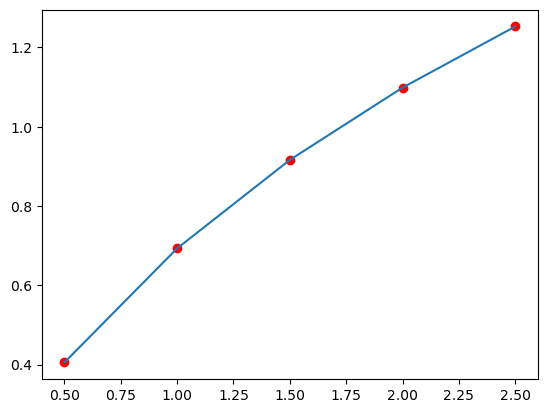

In [8]:

#1) Fit a 4th degree Newton’s divided difference polynomial to the data points


import numpy as np
from math import pi
from numpy.random import random
from matplotlib import pyplot as plt
from scipy.linalg import svd

def f(x):
    return np.log(1 + x)

x = np.array([0.5, 1, 1.5, 2, 2.5])
y = np.array([f(_) for _ in x])

def find_b():
    d = x.shape[0]
    b_table = np.zeros((d, d))
    b_table[:, 0] = y[:]

    for col in range(1, d):
        for row in range(d-col):
            del_x =  x[col+row] - x[row]
            b_table[row, col] = (b_table[row+1, col-1] - b_table[row, col-1]) / del_x
    return b_table[0, :]

def ndd_polynomial(x_new):
    b = find_b()
    d = x.shape[0]-1 #actual degree is d-1
    s = b[0]
    for i in range(1,d+1):  #loop continues when d==4
        prod = 1
        for j in range(i):
            prod = prod * (x_new - x[j])
        s = s + b[i] * prod
    return s

y_ = np.array([ndd_polynomial(_) for _ in x])

plt.scatter(x, y, color='red')
plt.plot(x, y_)
plt.show()

In [64]:
#Find distance traveled from 𝑡0 = 0.5 to 𝑡4 = 2.5 by integrating 𝑣(𝑡) using a
#2nd order polynomial with necessary number of segments


def distance_2nd(x, y):
    n_seg=x.shape[0]-1
    n = int((n_seg) / 2)
    print(n)
    h=(x[n_seg]-x[0])/(2*n)
    print(h)
    s=y[0]+y[n_seg]
    
    for i in range (1,n_seg):
        if i%2!=0:
            s=s+4*y[i]
    
    for j in range (2,n_seg-1):
        if j%2==0:
            s=s+2*y[j]
            
    
    return (h*s)/3



av = distance_2nd(x, y)
print("distance",av)

2
0.5
distance 1.7763079028773439


In [66]:
#3) Compare the results from 2 with an 𝑛 = 4 segments 1st order integration technique

def firdOrderInt(f,low,high,N):
    h=(high-low)/N
    s=f(low)+f(high)
    for i in range(1,N):
        xi=low+i*h
        s=s+2*f(xi)
    return (s*h)/2

N=4 # 4 segment
a,b=0.5,2.5
h=(b-a)/(N)
fa=firdOrderInt(f,a,b,N)
print(fa,av)
print("diff=",av-fa)

1.7685821197019882 1.7763079028773439
diff= 0.0077257831753556605
